<a href="https://colab.research.google.com/github/upwind1993/Numerical-Analysis/blob/main/18%EC%9E%A5/18%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

예제 18.2 이산 테이블에서 정보추출

In [ ]:
import numpy as np
Matl = np.array(['Wheat' , 'Rice' , 'Millet', 'Polyethylene',
                 'Corn', 'Polystyrene', 'Barley', 'Flaxseeds'])
Prop = np.array(['Absolute Density', 'Bulk Density', 'Percent Void',
                 'Particle Diameter', 'Shape Factor'])
TableData = np.array([[1400., 865., 39.2, 3.61, 1.07],
                     [1457., 905., 37.9, 2.72, 1.04],
                     [1180., 727., 38.4, 1.99, 1.07],
                     [ 922., 592., 35.8, 3.43, 1.02],
                     [1342., 743., 44.6, 7.26, 1.50],
                     [1058., 641., 39.4, 1.56, 1.14],
                     [1279., 725., 43.4, 3.70, 1.14],
                     [1129., 703., 37.8, 2.09, 1.05]])

In [ ]:
def TableLookup2(Row,Col,RowNames,ColNames,TableData):
    """
    Function for lookup in a two-dimensional table.
    Input:
        Row = name in row array
        Col = name in column array
        RowNames = row array
        ColNames = column array
        TableData = two-dimensional array of data in table
    Output:
        TableValue = value extracted from table
    """
    n = len(RowNames) ; m = len(ColNames)
    nt = np.size(TableData,0)
    mt = np.size(TableData,1)
    if n != nt or m != mt:
        return 'table information does not conform in size'
    ifind = False
    for i in range(n):
        if Row == RowNames[i]:
            isel = i
            ifind = True
            break
    if not ifind: return 'row name not found in table'
    jfind = False
    for j in range(m):
        if Col == ColNames[j]:
            jsel = j
            jfind = True
            break
    if not jfind: return 'column name not found in table'
    return TableData[isel,jsel]

# 함수의 적용 예시
MatlName = 'Corn'
PropName = 'Bulk Density'
TableValue = TableLookup2(MatlName,PropName,Matl,Prop,TableData)
if type(TableValue) == type(str()):
    print(TableValue)
else:
    print('{0:1} of {1:11} is {2:7.5g}'.format(PropName,MatlName,TableValue))


Bulk Density of Corn        is     743


In [ ]:
# 순차 검색 및 선형보간을 수행하는 파이썬 함수
import numpy as np
def TableLookup(x,y,xx):
    n = len(x)
    if n != len(y): return 'input arrays must be the same length'
    if xx < x[0] or xx > x[n-1]:
        return 'input value out of range of table'
    for i in range(n):
        if xx == x[i]:  # check for an exact match
            return y[i]
        elif x[i] > xx:  # check for upper interval
            i2 = i
            break
    xint = (xx-x[i2-1])/(x[i2]-x[i2-1])*(y[i2]-y[i2-1])+y[i2-1]
    return xint

In [ ]:
T = np.array([-40, 0., 20., 50., 100., 150., 200., 250.,
              300., 400., 500.])
rho = np.array([1.52, 1.29, 1.20, 1.09, 0.946, 0.935,
                0.746, 0.675, 0.616, 0.525, 0.457])
Tx = 350.
rhox = TableLookup(T,rho,Tx)
print(rhox)

0.5705


In [ ]:
Tx = -40.
rhox = TableLookup(T,rho,Tx)
print(rhox)


1.52


In [ ]:
Tx = -501.
rhox = TableLookup(T,rho,Tx)
print(rhox)


input value out of range of table


판다스 사용

In [1]:
import pandas as pd

# 표 데이터를 딕셔너리로 작성
data = {
    "재료": ["밀", "쌀", "기장", "폴리에틸렌", "옥수수", "폴리스티렌", "보리", "아마씨"],
    "절대 밀도 (kg/m³)": [1400, 1457, 1180, 922, 1342, 1058, 1279, 1129],
    "벌크 밀도 (kg/m³)": [865, 905, 727, 592, 743, 641, 725, 703],
    "공극율 (%)": [39.2, 37.9, 38.4, 35.8, 44.6, 39.1, 43.4, 37.8],
    "입자 직경 (mm)": [3.61, 2.72, 1.99, 3.43, 7.26, 1.56, 3.70, 2.09],
    "형상 계수": [1.07, 1.04, 1.07, 1.02, 1.16, 1.14, 1.14, 1.05]
}

# 데이터를 DataFrame으로 변환
df = pd.DataFrame(data)

# 속성 값을 가져오는 함수
def get_property_value(material, property_name):
    if material in df["재료"].values:
        if property_name in df.columns:
            value = df.loc[df["재료"] == material, property_name].values[0]
            return value
        else:
            return f"속성 '{property_name}'을(를) 찾을 수 없습니다."
    else:
        return f"재료 '{material}'을(를) 찾을 수 없습니다."

# 예시 사용
material = "옥수수"
property_name = "벌크 밀도 (kg/m³)"
print(get_property_value(material, property_name))


743


소구간 구간법 - Function cspline

In [11]:
import numpy as np

def tridiag(a, b, c, d):
    """
    Solve tridiagonal system of equations
    a, b, c are the sub-diagonal, main diagonal, and super-diagonal arrays
    d is the right-hand side vector
    """
    n = len(d)
    w = np.zeros(n-1)
    g = np.zeros(n)
    p = np.zeros(n)

    # Forward elimination
    w[0] = c[0] / b[0]
    g[0] = d[0] / b[0]
    for i in range(1, n-1):
        denominator = b[i] - a[i] * w[i-1]
        w[i] = c[i] / denominator
        g[i] = (d[i] - a[i] * g[i-1]) / denominator
    g[n-1] = (d[n-1] - a[n-1] * g[n-2]) / (b[n-1] - a[n-1] * w[n-2])

    # Back substitution
    p[n-1] = g[n-1]
    for i in range(n-2, -1, -1):
        p[i] = g[i] - w[i] * p[i+1]

    return p

def cspline(x,y,xx):
    """
    Cubic Spline Interpolation with Natural End Conditions
    input:
        x = array of independent variable values
        y = array of dependent variable values
        xx = input value for interpolation
    output:
        yy = interpolated value of y
    """
    n = len(x)
    if len(y) != n: return 'input arrays must be the same length'
    if xx < x[0] or xx > x[n-1]: return 'input value out of range of table'
    h = np.zeros((n-1))  # x interval widths
    for i in range(n-1):
        h[i] = x[i+1] - x[i]
    df = np.zeros((n-1))  # y over h finite differences
    for i in range(n-1):
        df[i] = (y[i+1]-y[i])/h[i]
    e = np.zeros((n))  # diagonals of coefficient matrix
    f = np.zeros((n))

    f[0] = 1 ; f[n-1] = 1
    g = np.zeros((n))
    for i in range(1,n-1):
        e[i] = h[i-1]
        f[i] = 2*(h[i-1] + h[i])
        g[i] = h[i]
    const = np.zeros((n))  # constant vector
    for i in range(1,n-1):
        const[i] = 3*(df[i]-df[i-1])
    c = tridiag(e,f,g,const)   # solve tridiagonal system
    b = np.zeros((n-1))  # calculate b coefficients from c
    for i in range(n-1):
        b[i] = (y[i+1]-y[i])/h[i]-h[i]/3*(2*c[i]+c[i+1])
    d = np.zeros((n-1))  # calculate d coefficients from c
    for i in range(n-1):
        d[i] = (c[i+1]-c[i])/3/h[i]
    for i in range(n):   # calculate interpolation
        if xx == x[i]:  # check for an exact match
            return y[i]
        elif x[i] > xx:  # check for upper interval
            i2 = i-1
            break
    yy = y[i2] + b[i2]*(xx-x[i2]) + c[i2]*(xx-x[i2])**2 + d[i2]*(xx-x[i2])**3
    return yy


Example Application

0.5707661719249749


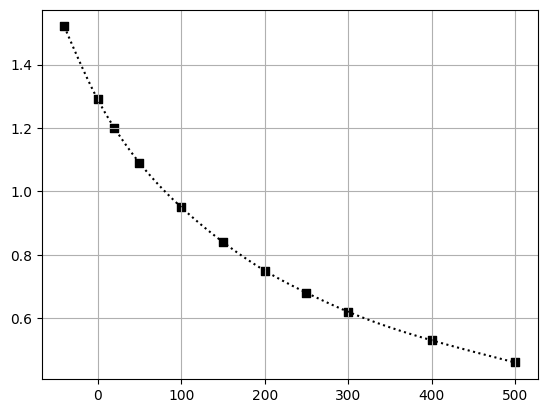

In [14]:
T = np.array([-40, 0., 20., 50., 100., 150., 200., 250.,300., 400., 500.])
rho = np.array([1.52, 1.29, 1.20, 1.09, 0.95, 0.84, 0.75, 0.68, 0.62, 0.53, 0.46])
Tx = 350.
rhox = cspline(T,rho,Tx)
print(rhox)

import pylab

Tplot = np.linspace(-40.,500.,100)
k = len(Tplot)
rhoplot = np.zeros((k))
for i in range(k):
    rhoplot[i] = cspline(T,rho,Tplot[i])
pylab.scatter(T,rho,c='k',marker='s')
pylab.plot(Tplot,rhoplot,c='k',ls = ':')
pylab.grid()

18.4 파이썬 내장함수를 사용한 스플라인

Runge 함수 <br>
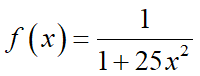

<br>
구간 [-1,1]에서 이 함수에서 샘플링된 동잉한 간격의 데이터점 9개에 3차원 스플라인을 적용하고, 끝단 조건(자연, 비절점, 기술기 f'=1 및 f_n-1' = -4인 고정 끝단조건)에 대한 결과를 비교하라.

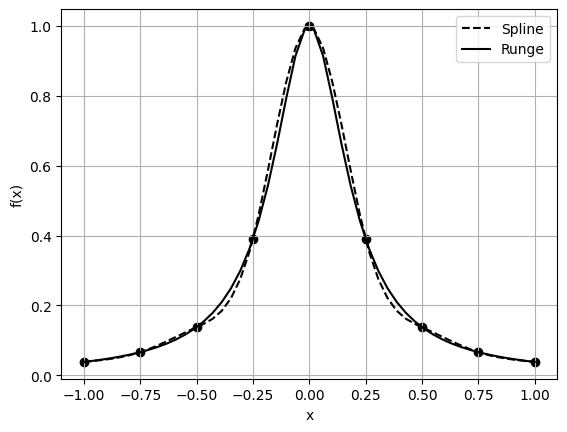

In [19]:
import numpy as np
from scipy.interpolate import CubicSpline
def Runge(x):
    return 1./(1. + 25.*x**2)
x = np.linspace(-1.,1.,9)
y = Runge(x)

xx = np.linspace(-1.,1)
cs = CubicSpline(x,y,bc_type='natural')
yy = cs(xx)

yR = Runge(xx)

import matplotlib.pyplot as plt
pylab.scatter(x,y,c='k',marker='o')
pylab.plot(xx,yy,c='k',ls = '--', label='Spline')
pylab.plot(xx,yR  ,c='k',label='Runge')
pylab.grid()
pylab.xlabel('x')
pylab.ylabel('f(x)')
pylab.legend()

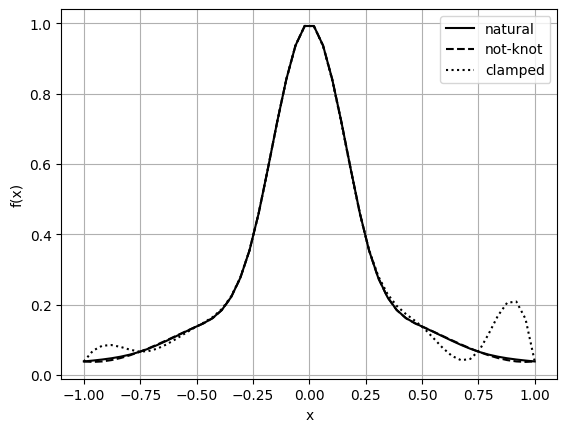

In [22]:
# not-knot
csk = CubicSpline(x,y,bc_type='not-a-knot')
yyk = csk(xx)
#Clamped with derivatives spec's
csc = CubicSpline(x,y,bc_type=((1,1.),(1,-4.)))
yyc = csc(xx)
#natural
csn = CubicSpline(x,y,bc_type='natural')
yy = csn(xx)

#plot natural. not-a-knot, and clamped
pylab.figure()
pylab.plot(xx,yy,c='k',label='natural')
pylab.plot(xx,yyk,c='k',ls='--',label='not-knot')
pylab.plot(xx,yyc,c='k',ls=':',label='clamped')
pylab.grid()
pylab.xlabel('x')
pylab.ylabel('f(x)')
pylab.legend()



파이썬 함수: interp1d <br>


from scipy.interpolate import interp1d <br>
f = interp1d(x,y,kind=’linear’) <br>
yy = f(xx) <br>
<br>
linear – linear interpolation
nearest – finds the nearest data point. This is sometimes<br>
              called nearest neighbor interpolation.<br>
quadratic – quadratic spline<br>
cubic -  cubic spline<br>

In [24]:
import numpy as np
from scipy.interpolate import interp1d
T = np.array([-40.,   0.,  20., 50., 100., 150., 200., 250.,
              300., 400., 500.])
rho = np.array([1.52,  1.29,  1.20,  1.09,  0.946, 0.835,
                0.746, 0.675, 0.616, 0.525, 0.457])
Tx = 350.
frho = interp1d(T,rho,kind='cubic')
rhox = frho(Tx)
print(rhox)

0.5666131930705898


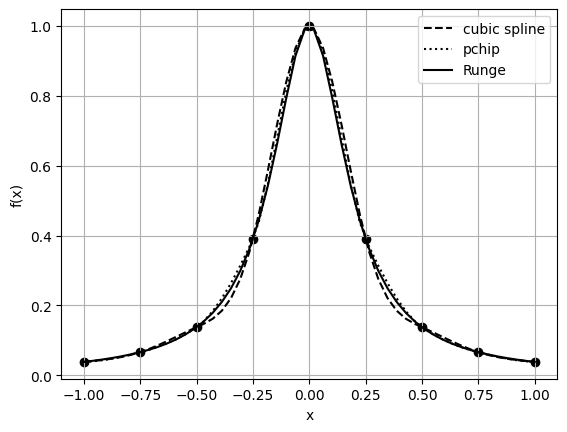

In [26]:
import numpy as np
import scipy.interpolate as intr
def Runge(x):
    return 1./(1. + 25.*x**2)
x = np.linspace(-1.,1.,9)
y = Runge(x)
xx = np.linspace(-1.,1)
cs = intr.CubicSpline(x,y,bc_type='natural')
yy = cs(xx)
cchip = intr.PchipInterpolator(x,y)
ychip = cchip(xx)
yR = Runge(xx)
import pylab
pylab.scatter(x,y,c='k',marker='o')
pylab.plot(xx,yy,c='k',ls='--',label='cubic spline')
pylab.plot(xx,ychip,c='k',ls=':',label='pchip')
pylab.plot(xx,yR,c='k',label='Runge')
pylab.grid()
pylab.xlabel('x')
pylab.ylabel('f(x)')
pylab.legend()

다차원 보간

RegularGridInterpolator

- SciPy 라이브러리에서 제공하는 보간(interpolation) 함수
- 정규 격자에 기반한 다차원 데이터의 보간을 수행하는 데 최적화


In [1]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator

# 주어진 데이터
x = np.array([2., 9.])
y = np.array([1., 6.])
z = np.array([[60., 57.5], [55., 70.]])

# RegularGridInterpolator 보간기 생성
f = RegularGridInterpolator((x, y), z, method='linear')

# 보간할 좌표
point = [5.25, 4.8]
result = f(point)
print(result)


[61.95357143]
